### **Step 0: Load in Libraries and Dataset**

In [191]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [192]:
# Load in dataset
df = pd.read_csv('loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [193]:
# Check summary of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### **Step 1: Cleaning**

In [194]:
# Standardize categorical columns to be consistent
df['person_education'] = df['person_education'].str.lower().str.strip()
df['person_home_ownership'] = df['person_home_ownership'].str.lower().str.strip()
df['loan_intent'] = df['loan_intent'].str.lower().str.strip()
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].str.lower().str.strip()

<Axes: xlabel='loan_amnt'>

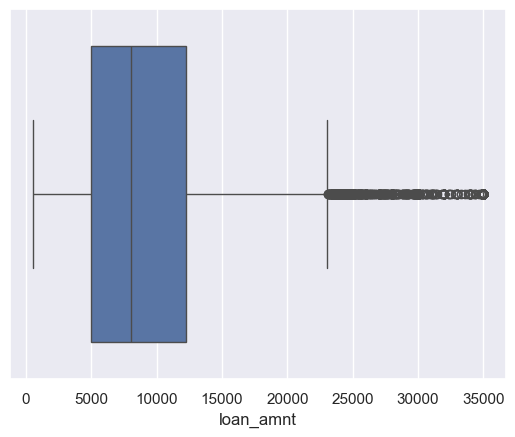

In [195]:
# Create a boxplot to detect outliers for loan_amount
sns.boxplot(x=df['loan_amnt'])

In [196]:
# Calculate IQR for loan_amount
Q1 = df['loan_amnt'].quantile(0.25)
Q3 = df['loan_amnt'].quantile(0.75)
IQR = Q3 - Q1

In [197]:
# Remove outliers that fall outside 1.5 * IQR range
df = df[(df['loan_amnt'] >= (Q1 - 1.5 * IQR)) & (df['loan_amnt'] <= (Q3 + 1.5 * IQR))]
len(df)

42652

<Axes: xlabel='person_income'>

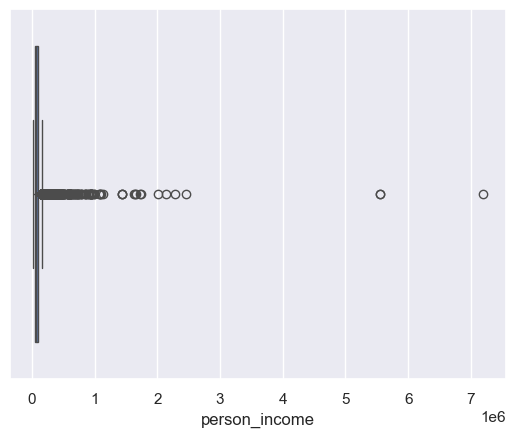

In [198]:
# Create a boxplot to detect outliers for income
sns.boxplot(x=df['person_income'])

In [199]:
# Calculate IQR for loan_amount
Q1 = df['person_income'].quantile(0.25)
Q3 = df['person_income'].quantile(0.75)
IQR = Q3 - Q1

In [200]:
# Remove outliers that fall outside 1.5 * IQR range
df = df[(df['person_income'] >= (Q1 - 1.5 * IQR)) & (df['person_income'] <= (Q3 + 1.5 * IQR))]
len(df)

40694

### **Step 2: EDA**

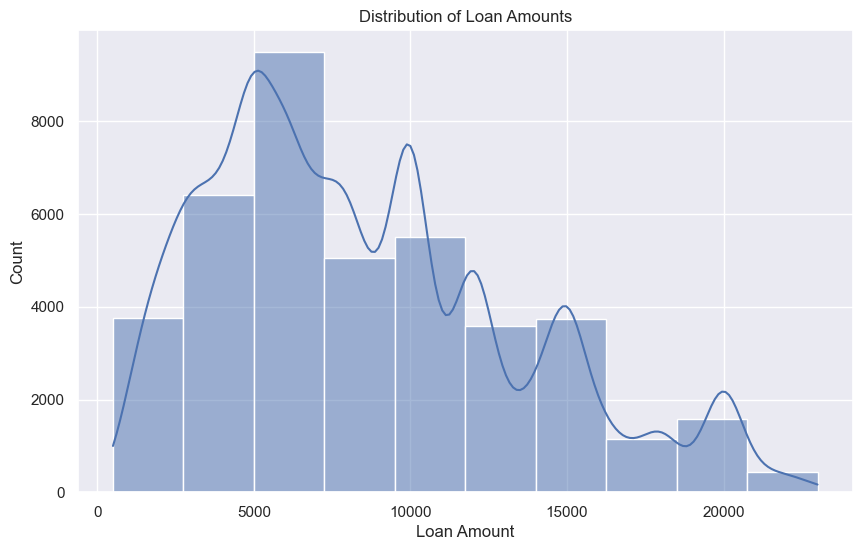

In [201]:
# Histogram for loan amount
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amnt'], bins=10, kde=True)
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Distribution of Loan Amounts')
plt.show()

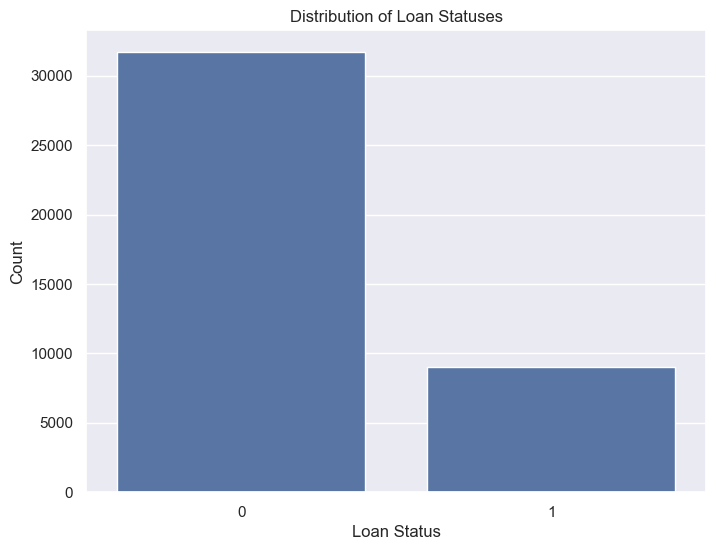

In [202]:
# Bar plot for loan approval status
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Statuses')
plt.show()

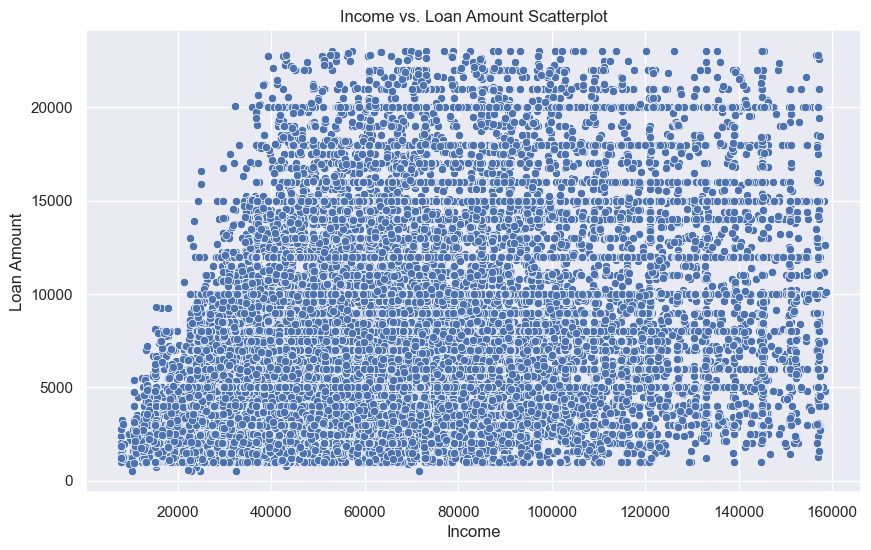

In [245]:
# Scatter plot between loan amount and income
plt.figure(figsize=(10,6))
sns.scatterplot(x='person_income', y='loan_amnt', data=df)
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.title('Income vs. Loan Amount Scatterplot')
plt.show()

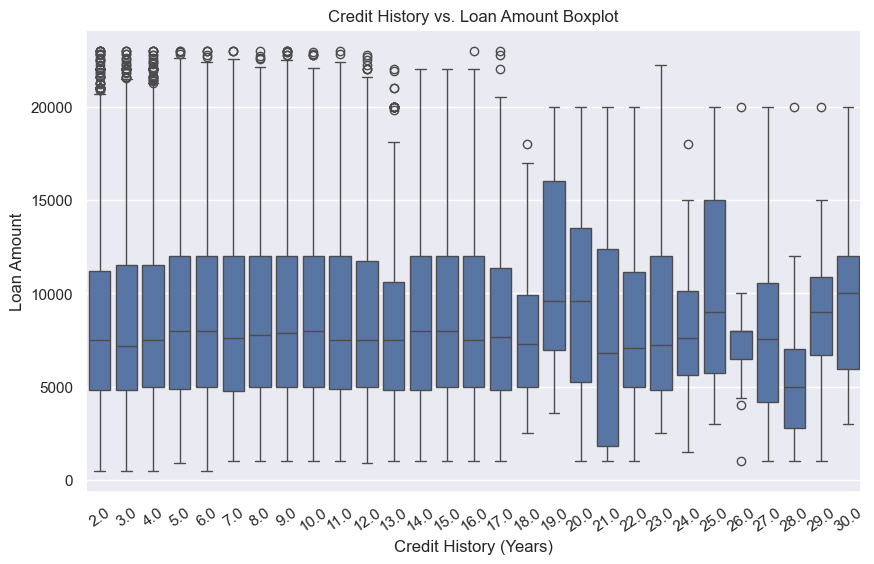

In [204]:
# Box plot for credit history vs loan approval
plt.figure(figsize=(10, 6))
sns.boxplot(x='cb_person_cred_hist_length', y='loan_amnt', data=df)
plt.xlabel('Credit History (Years)')
plt.xticks(rotation=35)
plt.ylabel('Loan Amount')
plt.title('Credit History vs. Loan Amount Boxplot')
plt.show()

In [205]:
# Variation in greater credit history
# Due to less people with credit history needing loans
df['cb_person_cred_hist_length'].describe()

count    40694.000000
mean         5.768148
std          3.821257
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64

In [206]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,high school,12282.0,0,own,1000.0,education,11.14,0.08,2.0,504,yes,0
2,25.0,female,high school,12438.0,3,mortgage,5500.0,medical,12.87,0.44,3.0,635,no,1
5,21.0,female,high school,12951.0,0,own,2500.0,venture,7.14,0.19,2.0,532,no,1
9,21.0,female,high school,12739.0,0,own,1600.0,venture,14.74,0.13,3.0,640,no,1
11,21.0,female,associate,13113.0,0,own,4500.0,homeimprovement,8.63,0.34,2.0,651,no,1


In [207]:
# Change any categorical or boolean variables to numeric to create a correlation matrix
from sklearn.preprocessing import LabelEncoder
numeric = df.copy()

numeric['person_gender'] = 1 * (numeric['person_gender'] == 'male')
numeric['previous_loan_defaults_on_file'] = 1* (numeric['previous_loan_defaults_on_file'] == 'yes')

le = LabelEncoder()
numeric['person_education'] = le.fit_transform(df['person_education'])
numeric['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
numeric['loan_intent'] = le.fit_transform(df['loan_intent'])
numeric.dtypes

person_age                        float64
person_gender                       int64
person_education                    int64
person_income                     float64
person_emp_exp                      int64
person_home_ownership               int64
loan_amnt                         float64
loan_intent                         int64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file      int64
loan_status                         int64
dtype: object

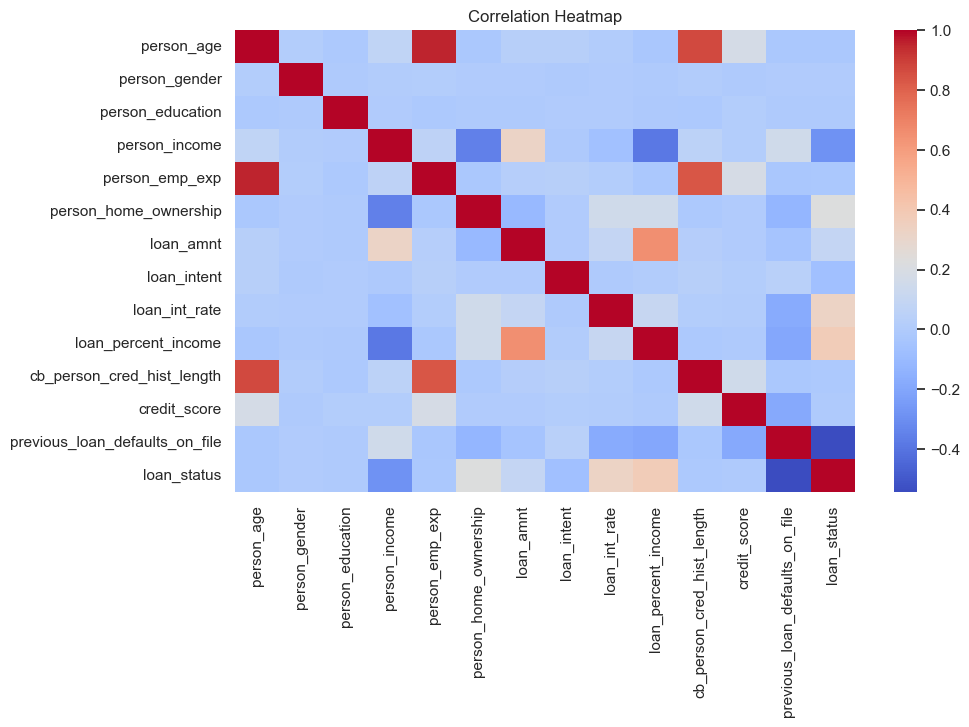

In [208]:
# Create our correlation matrix and heatmap
correlation = numeric.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [209]:
# Only gather correlation values with loan_status not including loan_status 
status_corr = correlation['loan_status'].drop('loan_status')
status_corr = status_corr.abs().sort_values(ascending=False)
status_corr = status_corr.reset_index()
status_corr.columns = ['Variable', 'Correlation with loan_status']
status_corr

,Variable,Correlation with loan_status
0,previous_loan_defaults_on_file,0.543956
1,loan_percent_income,0.374922
2,loan_int_rate,0.325187
3,person_income,0.284846
4,person_home_ownership,0.226658
5,loan_amnt,0.093717
6,loan_intent,0.067852
7,person_age,0.021248
8,person_emp_exp,0.020203
9,cb_person_cred_hist_length,0.014651


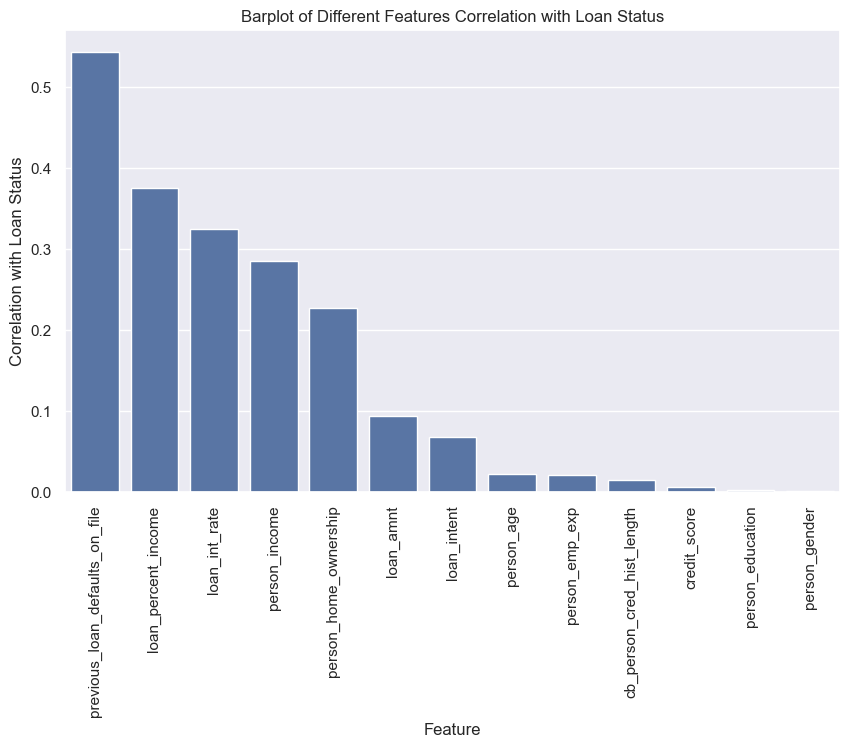

In [246]:
# Create countplot to better visualize relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='Correlation with loan_status', data=status_corr)
plt.xlabel('Feature')
plt.xticks(rotation=90)
plt.ylabel('Correlation with Loan Status')
plt.title('Barplot of Different Features Correlation with Loan Status')
plt.show()

### **Step 3: Modeling**

In [211]:
# Split our data into training and test sets while stratifying for loan_status
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, train_size=0.2, stratify=df['loan_status'], random_state=22)

In [212]:
# Fit logistic model with top all features from from our dataset
import statsmodels.formula.api as smf

log_model = smf.logit('loan_status ~ person_age + person_gender + person_education + person_income + person_emp_exp + person_home_ownership + loan_amnt + loan_intent + loan_int_rate + loan_percent_income + cb_person_cred_hist_length + credit_score + previous_loan_defaults_on_file', data=df_train).fit()
log_model.summary()

         Current function value: 0.218177
         Iterations: 35


/Users/isaac/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 8138
Model:                          Logit   Df Residuals:                     8115
Method:                           MLE   Df Model:                           22
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.5871
Time:                        21:00:16   Log-Likelihood:                -1775.5
converged:                      False   LL-Null:                       -4300.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                 0.1273      0.884      0.144      0.886      -1.606       1.860
person_gender[T.male]                    -0.0336      0.084     -0.400      0.689      -0.198       0.131
person_education[T.bachelor]              0.0657      0.113      0.580      0.562      -0.156       0.288
person_education[T.doctorate]            -0.4492      0.369     -1.216      0.224      -1.173       0.275
person_education[T.high school]          -0.1252      0.117     -1.072      0.284      -0.354       0.104
person_education[T.master]                0.1186      0.132      0.900      0.368      -0.140       0.377
person_home_ownership[T.other]            0.5009      0.756      0.663      0.507      -0.980       1.982
person_home_ownership[T.own]             -2.0026      0.271     -7.387      0.000      -2.534      -1.471
person_home_ownership[T.rent]             0.5948      0.097      6.101      0.000       0.404       0.786
loan_intent[T.education]                 -0.9801      0.138     -7.087      0.000      -1.251      -0.709
loan_intent[T.homeimprovement]           -0.0449      0.158     -0.284      0.776      -0.355       0.265
loan_intent[T.medical]                   -0.3847      0.132     -2.919      0.004      -0.643      -0.126
loan_intent[T.personal]                  -0.8882      0.143     -6.219      0.000      -1.168      -0.608
loan_intent[T.venture]                   -1.4075      0.153     -9.220      0.000      -1.707      -1.108
previous_loan_defaults_on_file[T.yes]   -27.0008   1.16e+04     -0.002      0.998   -2.27e+04    2.27e+04
person_age                                0.0037      0.026      0.145      0.885      -0.047       0.054
person_income                          3.992e-06   3.06e-06      1.307      0.191      -2e-06    9.98e-06
person_emp_exp                           -0.0151      0.023     -0.658      0.511      -0.060       0.030
loan_amnt                                -0.0002   2.18e-05     -8.170      0.000      -0.000      -0.000
loan_int_rate                             0.3375      0.016     21.419      0.000       0.307       0.368
loan_percent_income                      19.2013      1.351     14.215      0.000      16.554      21.849
cb_person_cred_hist_length                0.0375      0.023      1.662      0.097      -0.007       0.082
credit_score                             -0.0091      0.001     -9.253      0.000      -0.011      -0.007
=========================================================================================================

Possibly complete quasi-separation: A fraction 0.51 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [213]:
# Calculate pseudo-R^2 and AUC for our model
from sklearn.metrics import roc_auc_score

prsquared = log_model.prsquared
auc = roc_auc_score(y_true=df_train['loan_status'], y_score=log_model.predict(df_train))
print(f"Model Performance Metrics:")
print(f"- Pseudo R-squared: {prsquared:.3f}")
print(f"- AUC (Area Under the Curve): {auc:.3f}")

Model Performance Metrics:
- Pseudo R-squared: 0.587
- AUC (Area Under the Curve): 0.955


In [214]:
# Apply a classfication threshold of 0.5 on our predictions
df_test['phat'] = log_model.predict(df_test)
df_test['yhat'] = 1 * (df_test['phat'] >= 0.5)
df_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,phat,yhat
33093,24.0,male,master,104383.0,1,mortgage,10000.0,venture,11.41,0.10,3.0,678,no,0,0.058724,0
38309,35.0,male,master,103203.0,16,mortgage,9600.0,education,8.21,0.09,14.0,716,no,0,0.024788,0
7637,24.0,male,high school,90080.0,2,rent,6800.0,debtconsolidation,20.00,0.08,2.0,666,no,1,0.887704,1
15756,22.0,male,high school,125434.0,0,rent,15900.0,medical,13.49,0.13,2.0,637,no,0,0.322254,0
33495,23.0,male,bachelor,72675.0,0,mortgage,7000.0,education,6.79,0.10,3.0,682,no,0,0.027182,0


In [215]:
# Calculate our confusion matrix for our predictions
from sklearn.metrics import confusion_matrix

tn,fp,fn,tp = confusion_matrix(y_true=df_test['loan_status'], y_pred=df_test['yhat']).ravel()
print("Confusion Matrix Results:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")

Confusion Matrix Results:
- True Negatives (TN): 23854
- False Positives (FP): 1499
- False Negatives (FN): 1924
- True Positives (TP): 5279


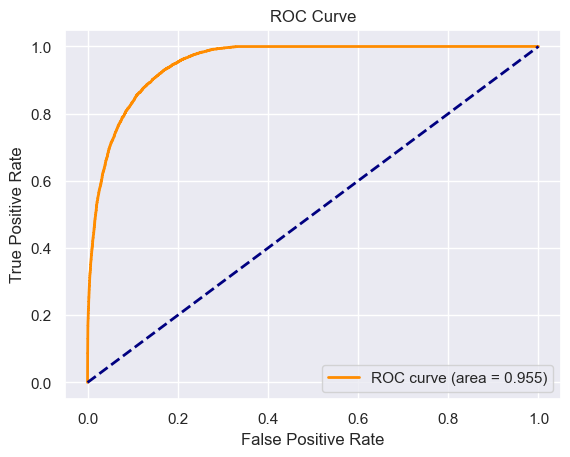

In [216]:
# Visualization of our roc_curve
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_true=df_test['loan_status'], y_score=df_test['phat'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

In [217]:
# Calculate accuracy rate, sensitivity, and specificity
acc_rate = (tn + tp)/len(df_test)
sens = tp/(tp + fn)
spec = tn/(tn + fp)
print("Classifier Performance Metrics:")
print(f"- Accuracy Rate: {acc_rate:.2%}")
print(f"- Sensitivity (True Positive Rate): {sens:.2%}")
print(f"- Specificity (True Negative Rate): {spec:.2%}")

Classifier Performance Metrics:
- Accuracy Rate: 89.49%
- Sensitivity (True Positive Rate): 73.29%
- Specificity (True Negative Rate): 94.09%


In [218]:
# Now fit model of our top 5 feature from our correlation matrix
log_model = smf.logit('loan_status ~ previous_loan_defaults_on_file + loan_percent_income + loan_int_rate + person_income + person_home_ownership', data=df_train).fit(maxiter=100)
print(log_model.summary())

         Current function value: 0.237932
         Iterations: 100
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 8138
Model:                          Logit   Df Residuals:                     8130
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.5497
Time:                        21:00:17   Log-Likelihood:                -1936.3
converged:                      False   LL-Null:                       -4300.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Intercept                                -4.5032      0.239    -18.829      0.000      -4

/Users/isaac/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [219]:
# Calculate pseudo-R^2 and AUC
prsquared = log_model.prsquared
auc = roc_auc_score(y_true=df_train['loan_status'], y_score=log_model.predict(df_train))
print(f"Model Performance Metrics:")
print(f"- Pseudo R-squared: {prsquared:.3f}")
print(f"- AUC (Area Under the Curve): {auc:.3f}")

Model Performance Metrics:
- Pseudo R-squared: 0.550
- AUC (Area Under the Curve): 0.946


In [220]:
# Apply classification threshold of 0.5 to our test set
df_test['phat'] = log_model.predict(df_test)
df_test['yhat'] = 1 * (df_test['phat'] >= 0.5)
df_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,phat,yhat
33093,24.0,male,master,104383.0,1,mortgage,10000.0,venture,11.41,0.10,3.0,678,no,0,0.142405,0
38309,35.0,male,master,103203.0,16,mortgage,9600.0,education,8.21,0.09,14.0,716,no,0,0.053576,0
7637,24.0,male,high school,90080.0,2,rent,6800.0,debtconsolidation,20.00,0.08,2.0,666,no,1,0.819637,1
15756,22.0,male,high school,125434.0,0,rent,15900.0,medical,13.49,0.13,2.0,637,no,0,0.335370,0
33495,23.0,male,bachelor,72675.0,0,mortgage,7000.0,education,6.79,0.10,3.0,682,no,0,0.062627,0


In [221]:
# Calculate confusion matrix
tn,fp,fn,tp = confusion_matrix(y_true=df_test['loan_status'], y_pred=df_test['yhat']).ravel()
print("Confusion Matrix Results:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")

Confusion Matrix Results:
- True Negatives (TN): 23665
- False Positives (FP): 1688
- False Negatives (FN): 1972
- True Positives (TP): 5231


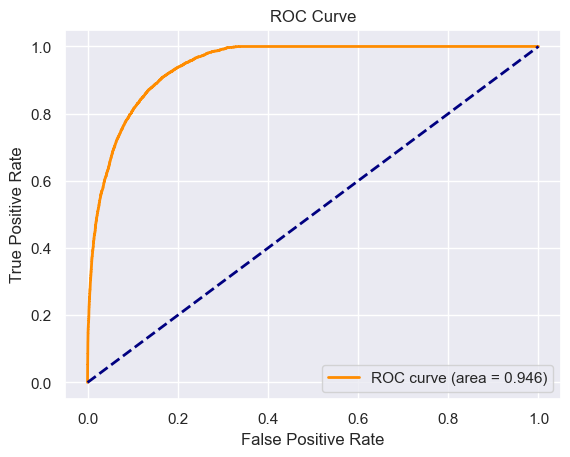

In [222]:
# Create our ROC curve visualization
fprs, tprs, thresholds = roc_curve(y_true=df_test['loan_status'], y_score=df_test['phat'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

In [223]:
# Calculate accuracy rate, sensitivity, and specificity
acc_rate = (tn + tp)/len(df_test)
sens = tp/(tp + fn)
spec = tn/(tn + fp)
print("Classifier Performance Metrics:")
print(f"- Accuracy Rate: {acc_rate:.2%}")
print(f"- Sensitivity (True Positive Rate): {sens:.2%}")
print(f"- Specificity (True Negative Rate): {spec:.2%}")

Classifier Performance Metrics:
- Accuracy Rate: 88.76%
- Sensitivity (True Positive Rate): 72.62%
- Specificity (True Negative Rate): 93.34%


In [224]:
# Fit model with features from first model with low p-values
log_model = smf.logit('loan_status ~ person_home_ownership + loan_amnt + loan_intent + loan_int_rate + loan_percent_income + credit_score', data=df_train).fit()
log_model.summary()

Optimization terminated successfully.
         Current function value: 0.353510
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            loan_status   No. Observations:                 8138
Model:                          Logit   Df Residuals:                     8125
Method:                           MLE   Df Model:                           12
Date:                Sat, 07 Dec 2024   Pseudo R-squ.:                  0.3310
Time:                        21:00:18   Log-Likelihood:                -2876.9
converged:                       True   LL-Null:                       -4300.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -6.2344      0.458    -13.621      0.000      -7.131      -5.337
person_home_ownership[T.other]     0.8552      0.577      1.483      0.138      -0.275       1.985
person_home_ownership[T.own]      -1.8233      0.234     -7.808      0.000      -2.281      -1.366
person_home_ownership[T.rent]      0.7966      0.079     10.093      0.000       0.642       0.951
loan_intent[T.education]          -0.9245      0.109     -8.486      0.000      -1.138      -0.711
loan_intent[T.homeimprovement]     0.0323      0.124      0.260      0.795      -0.211       0.276
loan_intent[T.medical]            -0.2456      0.102     -2.405      0.016      -0.446      -0.045
loan_intent[T.personal]           -0.7752      0.113     -6.854      0.000      -0.997      -0.554
loan_intent[T.venture]            -1.2452      0.123    -10.142      0.000      -1.486      -1.005
loan_amnt                         -0.0001   9.61e-06    -15.176      0.000      -0.000      -0.000
loan_int_rate                      0.3462      0.013     26.771      0.000       0.321       0.372
loan_percent_income               17.5604      0.587     29.900      0.000      16.409      18.712
credit_score                      -0.0007      0.001     -0.989      0.323      -0.002       0.001
==================================================================================================
"""

In [225]:
# Calculate pseudo-R^2 and AUC
prsquared = log_model.prsquared
auc = roc_auc_score(y_true=df_train['loan_status'], y_score=log_model.predict(df_train))
print(f"Model Performance Metrics:")
print(f"- Pseudo R-squared: {prsquared:.3f}")
print(f"- AUC (Area Under the Curve): {auc:.3f}")

Model Performance Metrics:
- Pseudo R-squared: 0.331
- AUC (Area Under the Curve): 0.864


In [226]:
# Apply classification threshold of 0.5 to our test set
df_test['phat'] = log_model.predict(df_test)
df_test['yhat'] = 1 * (df_test['phat'] >= 0.5)
df_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,phat,yhat
33093,24.0,male,master,104383.0,1,mortgage,10000.0,venture,11.41,0.10,3.0,678,no,0,0.024707,0
38309,35.0,male,master,103203.0,16,mortgage,9600.0,education,8.21,0.09,14.0,716,no,0,0.009901,0
7637,24.0,male,high school,90080.0,2,rent,6800.0,debtconsolidation,20.00,0.08,2.0,666,no,1,0.812064,1
15756,22.0,male,high school,125434.0,0,rent,15900.0,medical,13.49,0.13,2.0,637,no,0,0.187592,0
33495,23.0,male,bachelor,72675.0,0,mortgage,7000.0,education,6.79,0.10,3.0,682,no,0,0.010773,0


In [227]:
# Calculate confusion matrix
tn,fp,fn,tp = confusion_matrix(y_true=df_test['loan_status'], y_pred=df_test['yhat']).ravel()
print("Confusion Matrix Results:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")

Confusion Matrix Results:
- True Negatives (TN): 24033
- False Positives (FP): 1320
- False Negatives (FN): 3650
- True Positives (TP): 3553


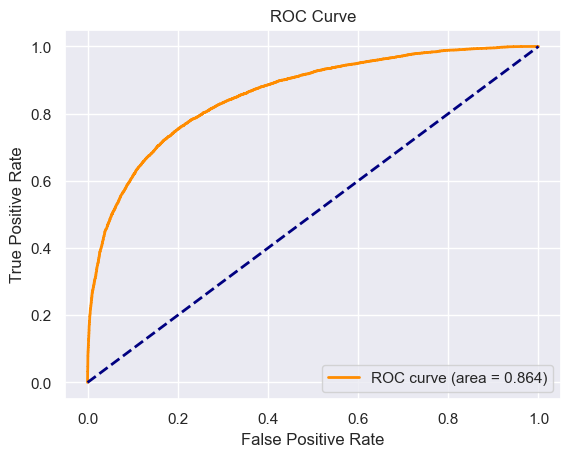

In [228]:
# Create our ROC curve visualization
fprs, tprs, thresholds = roc_curve(y_true=df_test['loan_status'], y_score=df_test['phat'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

In [229]:
# Calculate accuracy rate, sensitivity, and specificity
acc_rate = (tn + tp)/len(df_test)
sens = tp/(tp + fn)
spec = tn/(tn + fp)
print("Classifier Performance Metrics:")
print(f"- Accuracy Rate: {acc_rate:.2%}")
print(f"- Sensitivity (True Positive Rate): {sens:.2%}")
print(f"- Specificity (True Negative Rate): {spec:.2%}")

Classifier Performance Metrics:
- Accuracy Rate: 84.73%
- Sensitivity (True Positive Rate): 49.33%
- Specificity (True Negative Rate): 94.79%


In [230]:
best_model = smf.logit('loan_status ~ previous_loan_defaults_on_file + loan_percent_income + loan_int_rate + person_income + person_home_ownership', data=df_train).fit(maxiter=100)

         Current function value: 0.237932
         Iterations: 100


/Users/isaac/miniconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [256]:
# Show training and testing accuracy, and classification report
from sklearn.metrics import classification_report, accuracy_score

train_predictions = best_model.predict(df_train)
train_predictions = (train_predictions > 0.5).astype(int)  # Convert probabilities to binary classes

test_predictions = best_model.predict(df_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary classes

train_accuracy = accuracy_score(df_train['loan_status'], train_predictions)

test_accuracy = accuracy_score(df_test['loan_status'], test_predictions)

report = classification_report(df_test['loan_status'], test_predictions)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")
print("Classification Report:")
print(report)

Training Accuracy: 0.89
Testing Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     25353
           1       0.76      0.73      0.74      7203

    accuracy                           0.89     32556
   macro avg       0.84      0.83      0.83     32556
weighted avg       0.89      0.89      0.89     32556



In [252]:
# Calculate pseudo-R^2 and AUC
prsquared = log_model.prsquared
auc = roc_auc_score(y_true=df_train['loan_status'], y_score=best_model.predict(df_train))
print(f"Model Performance Metrics:")
print(f"- Pseudo R-squared: {prsquared:.3f}")
print(f"- AUC (Area Under the Curve): {auc:.3f}")

Model Performance Metrics:
- Pseudo R-squared: 0.331
- AUC (Area Under the Curve): 0.946


In [232]:
# Calculate feature importance based on coefficient values
import numpy as np

coefficients = best_model.params

feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'Absolute Coefficient': np.abs(coefficients.values)
})

feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

print(feature_importance)

                                 Feature  Coefficient  Absolute Coefficient
1  previous_loan_defaults_on_file[T.yes]   -27.958909             27.958909
5                    loan_percent_income     9.047158              9.047158
0                              Intercept    -4.503183              4.503183
3           person_home_ownership[T.own]    -1.817064              1.817064
2         person_home_ownership[T.other]     0.556007              0.556007
4          person_home_ownership[T.rent]     0.545919              0.545919
6                          loan_int_rate     0.314320              0.314320
7                          person_income    -0.000017              0.000017


In [233]:
# Apply classification threshold of 0.5 to our test set
df_test['phat'] = best_model.predict(df_test)
df_test['yhat'] = 1 * (df_test['phat'] >= 0.5)
df_test.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,phat,yhat
33093,24.0,male,master,104383.0,1,mortgage,10000.0,venture,11.41,0.10,3.0,678,no,0,0.142405,0
38309,35.0,male,master,103203.0,16,mortgage,9600.0,education,8.21,0.09,14.0,716,no,0,0.053576,0
7637,24.0,male,high school,90080.0,2,rent,6800.0,debtconsolidation,20.00,0.08,2.0,666,no,1,0.819637,1
15756,22.0,male,high school,125434.0,0,rent,15900.0,medical,13.49,0.13,2.0,637,no,0,0.335370,0
33495,23.0,male,bachelor,72675.0,0,mortgage,7000.0,education,6.79,0.10,3.0,682,no,0,0.062627,0


In [234]:
# Calculate confusion matrix
tn,fp,fn,tp = confusion_matrix(y_true=df_test['loan_status'], y_pred=df_test['yhat']).ravel()
print("Confusion Matrix Results:")
print(f"- True Negatives (TN): {tn}")
print(f"- False Positives (FP): {fp}")
print(f"- False Negatives (FN): {fn}")
print(f"- True Positives (TP): {tp}")

Confusion Matrix Results:
- True Negatives (TN): 23665
- False Positives (FP): 1688
- False Negatives (FN): 1972
- True Positives (TP): 5231


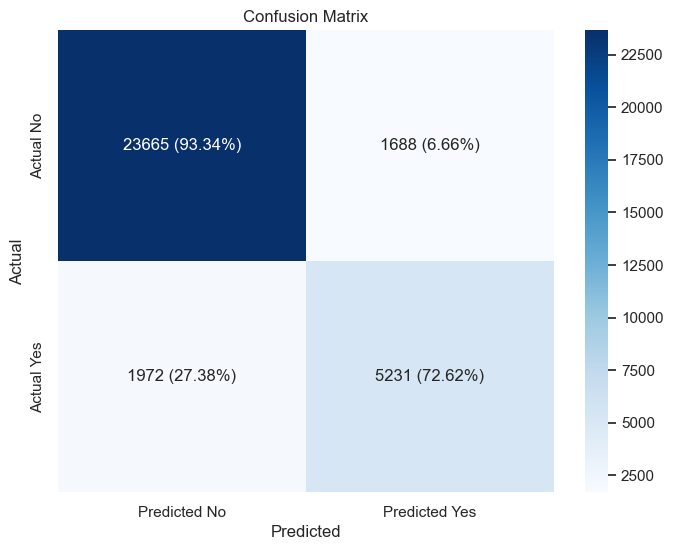

In [235]:
# Create confusion matrix heatmap
cm = confusion_matrix(df_test['loan_status'], df_test['yhat'])

cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

cm_combined = np.empty_like(cm, dtype=object)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        cm_combined[i, j] = f"{cm[i, j]} ({cm_percentage[i, j]:.2f}%)"

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=cm_combined, fmt='', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

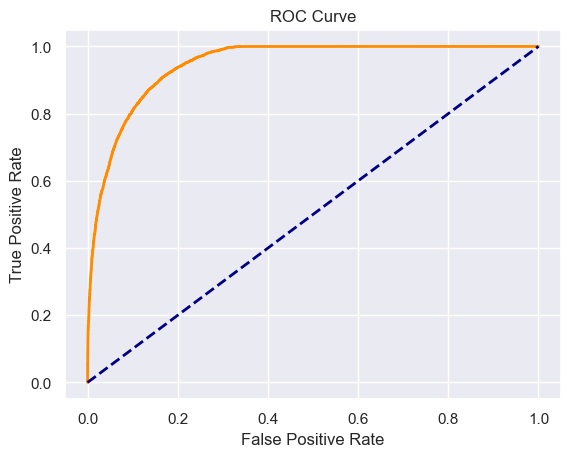

In [240]:
# Create our ROC curve visualization
fprs, tprs, thresholds = roc_curve(y_true=df_test['loan_status'], y_score=df_test['phat'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
plot_roc(fprs, tprs, auc)

In [239]:
# Calculate accuracy rate, sensitivity, and specificity
acc_rate = (tn + tp)/len(df_test)
sens = tp/(tp + fn)
spec = tn/(tn + fp)
print("Classifier Performance Metrics:")
print(f"- Accuracy Rate: {acc_rate:.2%}")
print(f"- Sensitivity (True Positive Rate): {sens:.2%}")
print(f"- Specificity (True Negative Rate): {spec:.2%}")

Classifier Performance Metrics:
- Accuracy Rate: 88.76%
- Sensitivity (True Positive Rate): 72.62%
- Specificity (True Negative Rate): 93.34%
